<a href="https://colab.research.google.com/github/digantkumar/Digant-Kumar/blob/master/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 3 - TEXT RECONSTRUCTION APPLICATION**

### **Importing the required libraries**

In [2]:

import os
from pathlib import Path
import glob
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
from keras.preprocessing.image import load_img, array_to_img, img_to_array, ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
np.random.seed(111)

Using TensorFlow backend.


In [0]:
# Creating the root mean square function
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))
        

### **DENSE, MULTI LAYER MODEL**

In [0]:
def build_autoencoder():
    # Flattening the size of the image to 226800 pixels (420*540)
    input_img = tf.keras.layers.Input(shape=(226800))
    
    # Encoder function to learn a compressed data structure
    hidden_layer_1 = tf.keras.layers.Dense(units = 128, activation = tf.nn.relu)(input_img)
    hidden_layer_2 = tf.keras.layers.Dense(units = 64, activation = tf.nn.relu)(hidden_layer_1)
    hidden_layer_3 = tf.keras.layers.Dense(units = 32, activation = tf.nn.relu)(hidden_layer_2)
    encoder = tf.keras.layers.Dense(units = 32, activation = tf.nn.sigmoid)(hidden_layer_3)
    
    # Decoder function to reconstruct the data from lower dimension to its higher dimension 
    hid_layer_1 = tf.keras.layers.Dense(units = 64, activation = tf.nn.relu)(encoder)
    hid_layer_2 = tf.keras.layers.Dense(units = 128, activation = tf.nn.relu)(hid_layer_1)
    decoder = tf.keras.layers.Dense(units = 226800, activation = tf.nn.sigmoid)(hid_layer_2)

    # Combines both the encoder and decoder and generates the output
    autoencoder = tf.keras.models.Model(inputs=input_img, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss=root_mean_squared_error)
    return autoencoder

autoencoder = build_autoencoder()

In [12]:
# Loading the dataset by uploading the files on Colab
train_images = glob.glob("Train/*.png")
train_labels = glob.glob("Train_cleaned/*.png")
test_images = glob.glob("Test/*.png")
X = []
Y = []
test_img_load = []

# Running a loop to go through the images and at the same time normalizing them
for img in train_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

for img in test_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    test_img_load.append(img)

X = np.array(X)
Y = np.array(Y)
test_img_load = np.array(test_img_load)

X = np.reshape(X, (X.shape[0], 226800))
Y = np.reshape(Y, (Y.shape[0], 226800))
test_img_load = np.reshape(test_img_load, (test_img_load.shape[0], 226800))

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

# Train your model
autoencoder.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_valid, y_valid))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Total number of training samples:  (129, 226800)
Total number of validation samples:  (15, 226800)
Epoch 1/100
17/17 [==============================] - 1s 35ms/step - loss: 0.4632 - val_loss: 0.4369
Epoch 2/100
17/17 [==============================] - 1s 30ms/step - loss: 0.3780 - val_loss: 0.2837
Epoch 3/100
17/17 [==============================] - 1s 31ms/step - loss: 0.2648 - val_loss: 0.2520
Epoch 4/100
17/17 [==============================] - 1s 30ms/step - loss: 0.2605 - val_loss: 0.2494
Epoch 5/100
17/17 [==============================] - 1s 30ms/step - loss: 0.2570 - val_loss: 0.2483
Epoch 6/100
17/17 [==============================] - 1s 31ms/step - loss: 0.2559 - val_loss: 0.2478
Epoch 7/100
17/17 [==============================] - 1s 30ms/step - loss: 0.2554 - val_loss: 0.2476
Epoch 8/100
17/17 [==============================] - 1s 30ms/step - loss: 0.2580 - val_loss: 0.2475
Epoch 9/100
17/17 [==============================] - 1s 30ms/step - loss: 0.2553 - val_loss: 0.2498
E

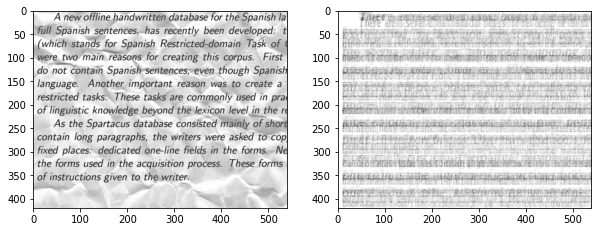

In [13]:
# Compute the prediction
predicted_label = np.squeeze(autoencoder.predict(test_img_load))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(test_img_load[1].reshape(420,540) , cmap='gray')
ax[1].imshow(predicted_label[1].reshape(420,540), cmap='gray')
plt.show()

### **CNN BASIC MODEL**

In [0]:
#################################################################################################
#########                           CNN BASIC MODEL                                      ########
#################################################################################################

def build_autoencoder():
  # Taking input in the form of 420*540*1
  input_img = tf.keras.layers.Input(shape=(420, 540, 1))

  # Encoder
  x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

  # Decoder
  x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

  # Model
  autoencoder = tf.keras.models.Model(input_img, decoded)
  autoencoder.compile(optimizer='adadelta', loss=root_mean_squared_error)
  return autoencoder

autoencoder = build_autoencoder()


In [15]:
train_images = glob.glob("Train/*.png")
train_labels = glob.glob("Train_cleaned/*.png")
test_images = glob.glob("Test/*.png")
X = []
Y = []
test_img_load = []

for img in train_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

for img in test_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    test_img_load.append(img)

X = np.array(X)
Y = np.array(Y)
test_img_load = np.array(test_img_load)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

# Train your model
autoencoder.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_valid, y_valid))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)
Epoch 1/100
17/17 [==============================] - 2s 91ms/step - loss: 0.5086 - val_loss: 0.5068
Epoch 2/100
17/17 [==============================] - 1s 63ms/step - loss: 0.5088 - val_loss: 0.5064
Epoch 3/100
17/17 [==============================] - 1s 62ms/step - loss: 0.5080 - val_loss: 0.5060
Epoch 4/100
17/17 [==============================] - 1s 62ms/step - loss: 0.5076 - val_loss: 0.5057
Epoch 5/100
17/17 [==============================] - 1s 62ms/step - loss: 0.5073 - val_loss: 0.5053
Epoch 6/100
17/17 [==============================] - 1s 63ms/step - loss: 0.5072 - val_loss: 0.5049
Epoch 7/100
17/17 [==============================] - 1s 62ms/step - loss: 0.5064 - val_loss: 0.5045
Epoch 8/100
17/17 [==============================] - 1s 61ms/step - loss: 0.5061 - val_loss: 0.5041
Epoch 9/100
17/17 [==============================] - 1s 62ms/step - loss: 0.5055 - val_loss

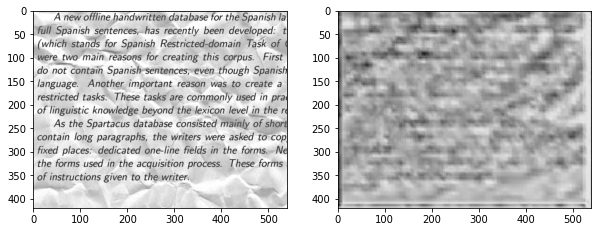

In [16]:
# Compute the prediction
predicted_label = np.squeeze(autoencoder.predict(test_img_load))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(test_img_load[1]), cmap='gray')
ax[1].imshow(predicted_label[1], cmap='gray')
plt.show()

### **CNN COMPLEX MODEL 1**

In [0]:

#################################################################################################
#########                        CNN COMPLEX MODEL 1                                     ########
#################################################################################################

def build_autoencoder():
  input_img = tf.keras.layers.Input(shape=(420, 540, 1))

  # Encoder
  x = tf.keras.layers.Conv2D(16, (4, 4), activation='relu', padding='same')(input_img)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Conv2D(8, (4, 4), activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D(8, (4, 4), activation='relu', padding='same')(x)
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Conv2D(8, (4, 4), activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Dense(units = 16, activation='relu')(x)
  encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  

  # Decoder
  x = tf.keras.layers.Conv2D(8, (4, 4), activation='relu', padding='same')(encoded)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(8, (4, 4), activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Dense(units = 16, activation='relu')(x)
  decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

  # Model
  autoencoder = tf.keras.models.Model(input_img, decoded)
  autoencoder.compile(optimizer='adam', loss=root_mean_squared_error)
  return autoencoder

autoencoder = build_autoencoder()

In [18]:
train_images = glob.glob("Train/*.png")
train_labels = glob.glob("Train_cleaned/*.png")
test_images = glob.glob("Test/*.png")
X = []
Y = []
test_img_load = []

for img in train_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

for img in test_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    test_img_load.append(img)

X = np.array(X)
Y = np.array(Y)
test_img_load = np.array(test_img_load)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

# Train your model
autoencoder.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_valid, y_valid))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)
Epoch 1/100
17/17 [==============================] - 2s 132ms/step - loss: 0.3052 - val_loss: 0.4004
Epoch 2/100
17/17 [==============================] - 2s 105ms/step - loss: 0.2478 - val_loss: 0.3504
Epoch 3/100
17/17 [==============================] - 2s 104ms/step - loss: 0.2359 - val_loss: 0.2915
Epoch 4/100
17/17 [==============================] - 2s 104ms/step - loss: 0.2336 - val_loss: 0.2610
Epoch 5/100
17/17 [==============================] - 2s 104ms/step - loss: 0.2304 - val_loss: 0.2559
Epoch 6/100
17/17 [==============================] - 2s 103ms/step - loss: 0.2271 - val_loss: 0.2570
Epoch 7/100
17/17 [==============================] - 2s 104ms/step - loss: 0.2260 - val_loss: 0.2632
Epoch 8/100
17/17 [==============================] - 2s 104ms/step - loss: 0.2253 - val_loss: 0.2666
Epoch 9/100
17/17 [==============================] - 2s 104ms/step - loss: 0.2235 -

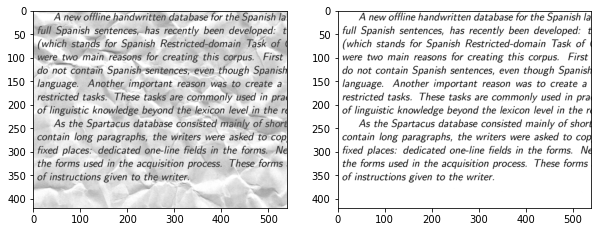

In [18]:
# Compute the prediction
predicted_label = np.squeeze(autoencoder.predict(test_img_load))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(test_img_load[1]), cmap='gray')
ax[1].imshow(predicted_label[1], cmap='gray')
plt.show()

### **CNN COMPLEX MODEL 2**

In [45]:
#################################################################################################
#########                        CNN COMPLEX MODEL 2                                     ########
#################################################################################################

def build_autoencoder():
  input_img = tf.keras.layers.Input(shape=(420, 540, 1))

  # Encoder
  x = tf.keras.layers.Conv2D(32, (5, 5), activation=tf.nn.leaky_relu, padding='same')(input_img)
  x = tf.keras.layers.BatchNormalization()(x)
  #x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Conv2D(16, (5, 5), activation=tf.nn.leaky_relu, padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  #x = tf.keras.layers.Conv2D(16, (5, 5), activation=tf.nn.leaky_relu, padding='same')(x)
  #x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  #x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D(8, (5, 5), activation=tf.nn.leaky_relu, padding='same')(x)
  x = tf.keras.layers.Dense(units = 64, activation=tf.nn.leaky_relu)(x)
  encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  

  # Decoder
  x = tf.keras.layers.Conv2D(8, (5, 5), activation=tf.nn.leaky_relu, padding='same')(encoded)
  x = tf.keras.layers.BatchNormalization()(x)
  #x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(8, (5, 5), activation=tf.nn.leaky_relu, padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  #x = tf.keras.layers.Conv2D(8, (5, 5), activation=tf.nn.leaky_relu, padding='same')(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  #x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D(16, (5, 5), activation=tf.nn.leaky_relu, padding='same')(x)
  #x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Dense(units = 64, activation=tf.nn.leaky_relu)(x)
  decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

  # Model
  autoencoder = tf.keras.models.Model(input_img, decoded)
  optimizer = tf.keras.optimizers.Adam(lr=0.003)
  autoencoder.compile(optimizer=optimizer, loss=root_mean_squared_error)
  return autoencoder

autoencoder = build_autoencoder()
autoencoder.summary()



Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 420, 540, 32)      832       
_________________________________________________________________
batch_normalization_96 (Batc (None, 420, 540, 32)      128       
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 420, 540, 16)      12816     
_________________________________________________________________
batch_normalization_97 (Batc (None, 420, 540, 16)      64        
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 420, 540, 8)       3208      
_________________________________________________________________
dense_36 (Dense)             (None, 420, 540, 64)      576

In [46]:
train_images = glob.glob("Train/*.png")
train_labels = glob.glob("Train_cleaned/*.png")
test_images = glob.glob("Test/*.png")
X = []
Y = []
test_img_load = []

for img in train_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

for img in test_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    test_img_load.append(img)

X = np.array(X)
Y = np.array(Y)
test_img_load = np.array(test_img_load)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

# Train your model
autoencoder.fit(X_train, y_train, epochs=100, batch_size=4, validation_data=(X_valid, y_valid))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)
Epoch 1/100
33/33 [==============================] - 5s 150ms/step - loss: 0.1638 - val_loss: 0.2059
Epoch 2/100
33/33 [==============================] - 5s 139ms/step - loss: 0.0946 - val_loss: 0.2557
Epoch 3/100
33/33 [==============================] - 5s 138ms/step - loss: 0.0758 - val_loss: 0.2712
Epoch 4/100
33/33 [==============================] - 5s 138ms/step - loss: 0.0674 - val_loss: 0.2712
Epoch 5/100
33/33 [==============================] - 5s 138ms/step - loss: 0.0595 - val_loss: 0.2673
Epoch 6/100
33/33 [==============================] - 5s 138ms/step - loss: 0.0551 - val_loss: 0.2544
Epoch 7/100
33/33 [==============================] - 5s 138ms/step - loss: 0.0530 - val_loss: 0.2501
Epoch 8/100
33/33 [==============================] - 5s 148ms/step - loss: 0.0536 - val_loss: 0.2569
Epoch 9/100
33/33 [==============================] - 5s 139ms/step - loss: 0.0492 -

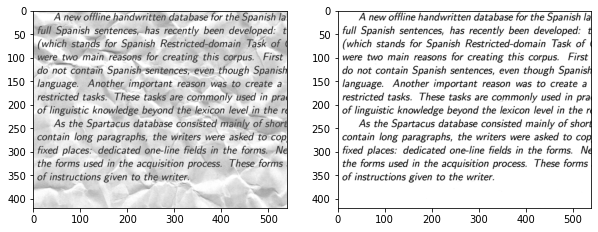

In [47]:
# Compute the prediction
predicted_label = np.squeeze(autoencoder.predict(test_img_load))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(test_img_load[1]), cmap='gray')
ax[1].imshow(predicted_label[1], cmap='gray')
plt.show()

In [19]:

def build_autoencoder():
  input_img = tf.keras.layers.Input(shape=(420, 540, 1))

  # Encoder
  x = tf.keras.layers.Conv2D(16, (5, 5), activation=tf.nn.leaky_relu, padding='same')(input_img)
  x = tf.keras.layers.BatchNormalization()(x)
  #x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Conv2D(16, (5, 5), activation=tf.nn.leaky_relu, padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D(16, (5, 5), activation=tf.nn.leaky_relu, padding='same')(x)
  #x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D(16, (5, 5), activation=tf.nn.leaky_relu, padding='same')(x)
  x = tf.keras.layers.Dense(units = 64, activation=tf.nn.leaky_relu)(x)
  encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  

  # Decoder
  x = tf.keras.layers.Conv2D(16, (5, 5), activation=tf.nn.leaky_relu, padding='same')(encoded)
  x = tf.keras.layers.BatchNormalization()(x)
  #x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(16, (5, 5), activation=tf.nn.leaky_relu, padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D(16, (5, 5), activation=tf.nn.leaky_relu, padding='same')(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D(16, (5, 5), activation=tf.nn.leaky_relu, padding='same')(x)
  #x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Dense(units = 64, activation=tf.nn.leaky_relu)(x)
  decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

  # Model
  autoencoder = tf.keras.models.Model(input_img, decoded)
  autoencoder.compile(optimizer='adam', loss=root_mean_squared_error)
  return autoencoder

autoencoder = build_autoencoder()
autoencoder.summary()


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 420, 540, 16)      416       
_________________________________________________________________
batch_normalization_30 (Batc (None, 420, 540, 16)      64        
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 420, 540, 16)      6416      
_________________________________________________________________
batch_normalization_31 (Batc (None, 420, 540, 16)      64        
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 420, 540, 16)      6416      
_________________________________________________________________
batch_normalization_32 (Batc (None, 420, 540, 16)      64  

In [20]:
train_images = glob.glob("Train/*.png")
train_labels = glob.glob("Train_cleaned/*.png")
test_images = glob.glob("Test/*.png")
X = []
Y = []
test_img_load = []

for img in train_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

for img in test_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    test_img_load.append(img)

X = np.array(X)
Y = np.array(Y)
test_img_load = np.array(test_img_load)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

# Train your model
autoencoder.fit(X_train, y_train, epochs=100, batch_size=4, validation_data=(X_valid, y_valid))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)
Epoch 1/100
33/33 [==============================] - 5s 164ms/step - loss: 0.2900 - val_loss: 0.2787
Epoch 2/100
33/33 [==============================] - 5s 156ms/step - loss: 0.2895 - val_loss: 0.2787
Epoch 3/100
33/33 [==============================] - 5s 156ms/step - loss: 0.2892 - val_loss: 0.2787
Epoch 4/100
33/33 [==============================] - 5s 155ms/step - loss: 0.2896 - val_loss: 0.2787
Epoch 5/100
 9/33 [=======>......................] - ETA: 3s - loss: 0.2934

KeyboardInterrupt: ignored